# Project: We Rate Dogs Data Wrangling and Analyzation

# Table of Contents

1. IMPORTING LIBRARIES

    1.1 import pandas as pd
    
    1.2 import numpy as np
    
    1.3 import requests
    
    1.4 import os
    
    1.5 import json
    
    1.5 import matplotlib.pyplot as plot
    
    1.6 %matplotlib inline
    

2. DATA GATHERING

    2.1 Gather 'twitter-archive-enhance.csv'
    
    2.2 Gather 'image_predictions.tsv'
    
    2.3 Gather 'tweet_json.txt'
    
    
3. DATA CLEANING

    3.1 Clean Quality issues
    
    3.1 Clean Tidiness issues
    
    
4. DATA STORING


5. DATA ANALYZING and VISUALIZATION

## Importing Libraries
Importation of libraries to be used for analysis We Rate Dogs Dataset

In [1]:
import pandas as pd
import numpy as np
import requests
import os
import json
import matplotlib.pyplot as plot
%matplotlib inline

## Data Gathering
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
archive_enhanced_df = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
folder_name = 'image_predictions.tsv'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
# specify the quoted url and assign requests.get(url) to outcome
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [4]:
response

<Response [200]>

In [5]:
image_predict_df = pd.read_csv('image-predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
# read the tweet_json line by line
with open('tweet_json.txt', 'r') as file:
    read_lines = file.readlines()

In [7]:
# the file is a list, so create an empty list
tweet_id = []
retweet_count = []
favorite_count = []
for line in read_lines:
    # read the needed line into dictionary 
    line_dictionary = json.loads(line)
    tweet_id.append(line_dictionary['id_str'])
    retweet_count.append(line_dictionary['retweet_count'])
    favorite_count.append(line_dictionary['favorite_count'])
    

In [8]:
# set the three data into dictionary
tweet_dic = {'tweet_id': tweet_id, 'retweet_count': retweet_count, 'favorite_count': favorite_count}

# read the dictionary into DataFrame 
tweet_df = pd.DataFrame.from_dict(tweet_dic)

## Assessing Data

In [9]:
archive_enhanced_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [10]:
archive_enhanced_df.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [11]:
# show the details of archive_enhanced
archive_enhanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
# showcase more of this data
archive_enhanced_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
# to get the total row and column
archive_enhanced_df.shape

(2356, 17)

In [14]:
archive_enhanced_df.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [15]:
# to check if there is duplicate
archive_enhanced_df.duplicated().sum()

0

In [16]:
archive_enhanced_df.loc[:, 'source'].head()

0    <a href="http://twitter.com/download/iphone" r...
1    <a href="http://twitter.com/download/iphone" r...
2    <a href="http://twitter.com/download/iphone" r...
3    <a href="http://twitter.com/download/iphone" r...
4    <a href="http://twitter.com/download/iphone" r...
Name: source, dtype: object

In [17]:
archive_enhanced_df.loc[:, 'text']
        

0       This is Phineas. He's a mystical boy. Only eve...
1       This is Tilly. She's just checking pup on you....
2       This is Archie. He is a rare Norwegian Pouncin...
3       This is Darla. She commenced a snooze mid meal...
4       This is Franklin. He would like you to stop ca...
5       Here we have a majestic great white breaching ...
6       Meet Jax. He enjoys ice cream so much he gets ...
7       When you watch your owner call another dog a g...
8       This is Zoey. She doesn't want to be one of th...
9       This is Cassie. She is a college pup. Studying...
10      This is Koda. He is a South Australian decksha...
11      This is Bruno. He is a service shark. Only get...
12      Here's a puppo that seems to be on the fence a...
13      This is Ted. He does his best. Sometimes that'...
14      This is Stuart. He's sporting his favorite fan...
15      This is Oliver. You're witnessing one of his m...
16      This is Jim. He found a fren. Taught him how t...
17      This i

In [18]:
archive_enhanced_df.loc[:, 'name']

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
5           None
6            Jax
7           None
8           Zoey
9         Cassie
10          Koda
11         Bruno
12          None
13           Ted
14        Stuart
15        Oliver
16           Jim
17          Zeke
18       Ralphus
19        Canela
20        Gerald
21       Jeffrey
22          such
23        Canela
24          None
25          None
26          Maya
27        Mingus
28         Derek
29        Roscoe
          ...   
2326       quite
2327           a
2328        None
2329        None
2330        None
2331        None
2332        None
2333          an
2334           a
2335          an
2336        None
2337        None
2338        None
2339        None
2340        None
2341        None
2342        None
2343        None
2344        None
2345         the
2346         the
2347           a
2348           a
2349          an
2350           a
2351        None
2352           a
2353          

In [19]:
archive_enhanced_df.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Lucy          11
Cooper        11
Lola          10
Tucker        10
Penny         10
Bo             9
Winston        9
the            8
Sadie          8
Daisy          7
Buddy          7
an             7
Bailey         7
Toby           7
Leo            6
Milo           6
Oscar          6
Dave           6
Stanley        6
Koda           6
Bella          6
Rusty          6
Jack           6
Scout          6
Jax            6
Sunny          5
            ... 
Shiloh         1
Harvey         1
Geno           1
Flurpson       1
Jennifur       1
Shnuggles      1
Vince          1
Bilbo          1
Strudel        1
Lipton         1
Andru          1
Herb           1
Humphrey       1
Zara           1
Derby          1
Bloop          1
Sid            1
Tove           1
Luther         1
Rufio          1
Kaia           1
Aqua           1
Livvie         1
Willem         1
Miguel         1
Mac            1
Franq          1
Yukon         

In [20]:
archive_enhanced_df.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout',
       'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', '

In [21]:
archive_enhanced_df.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [22]:
archive_enhanced_df.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [23]:
archive_enhanced_df.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [24]:
archive_enhanced_df.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [25]:
image_predict_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [26]:
image_predict_df.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [27]:
image_predict_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [28]:
image_predict_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [29]:
image_predict_df.shape

(2075, 12)

In [30]:
image_predict_df.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [31]:
image_predict_df.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [32]:
image_predict_df.duplicated().sum()

0

In [33]:
image_predict_df.loc[:, 'jpg_url']

0         https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg
1         https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg
2         https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg
3         https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg
4         https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg
5         https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg
6         https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg
7         https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg
8         https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg
9         https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg
10        https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg
11        https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg
12        https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg
13        https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg
14        https://pbs.twimg.com/media/CT5w9gUW4AAsBNN.jpg
15        https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg
16        https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg
17        http

In [34]:
image_predict_df.iloc[:, 2]

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
2045    1
2046    1
2047    1
2048    2
2049    1
2050    1
2051    2
2052    1
2053    1
2054    1
2055    2
2056    3
2057    1
2058    1
2059    1
2060    1
2061    1
2062    1
2063    1
2064    1
2065    1
2066    1
2067    2
2068    1
2069    1
2070    2
2071    1
2072    1
2073    1
2074    1
Name: img_num, Length: 2075, dtype: int64

In [35]:
tweet_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [36]:
tweet_df.tail()

,tweet_id,retweet_count,favorite_count
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


In [37]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


In [38]:
tweet_df.describe()

,retweet_count,favorite_count
count,2354.000000,2354.000000
mean,3164.797366,8080.968564
std,5284.770364,11814.771334
min,0.000000,0.000000
25%,624.500000,1415.000000
50%,1473.500000,3603.500000
75%,3652.000000,10122.250000
max,79515.000000,132810.000000


In [39]:
tweet_df.nunique()

tweet_id          2354
retweet_count     1724
favorite_count    2007
dtype: int64

In [40]:
tweet_df.duplicated().sum()

0

In [41]:
tweet_df.shape

(2354, 3)

In [42]:
tweet_df.isna().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

In [43]:
archive_enhanced_df[archive_enhanced_df.name == 'a'][['tweet_id', 'name']].sum()

tweet_id                                 37868219963639533596
name        aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...
dtype: object

In [44]:
all_columns = pd.Series(list(archive_enhanced_df) + list(tweet_df) + list(image_predict_df))
all_columns[all_columns.duplicated()]

17    tweet_id
20    tweet_id
dtype: object

### Quality issues
1. The archive_enhanced_df has 181 retweeted value that are non-null

2. columns that are not needed, like retweeted column, etc.

3. The timestamp column is a string instead of datetime

4. Text for canela is duplicated

5. Dog name like O'Malley was 'O', Quizno was his

6. The column for 'name' have some invalid names such as; a, none, etc.

7. There are some typographical error in the names of the dog

8. 'rating_numerator' less than 10, which is wrongly extracted

### Tidiness issues
1. Archive_enhanced_df have four columns which are, doggo, floofer, pupper and puppo, the four columns is all about the stages of dog.

2. The three datasets which are archive_enhanced, image_predictions and tweet_df have to be one dataset

## Data Cleaning

In [45]:
# Make copies of original pieces of data
archive_enhanced_clean = archive_enhanced_df.copy() 
image_predict_clean = image_predict_df.copy()
json_tweet_clean = tweet_df.copy()

### Cleaning Quality issues

### Issue #1:  The archive_enhanced_df has 181 retweeted value that are non-null

#### Define: drop the non-null in retweeted value

### Code

In [46]:
rnn_value = (archive_enhanced_clean[~archive_enhanced_clean.retweeted_status_id.isnull()]).index

archive_enhanced_clean = archive_enhanced_clean.drop(index=rnn_value)

#### Test

In [47]:
archive_enhanced_clean[~archive_enhanced_clean.retweeted_status_id.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #2: columns that are not needed, like retweeted column, etc.

#### Define:  retweeted columns are not needed, likewise in_reply_to_status_id and in_reply_to_user_id will drop from archive_enhanced dataframe.

#### Code

In [48]:
columns_not_needed = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id',
                     'retweeted_status_timestamp']
archive_enhanced_clean.drop(columns_not_needed, axis = 1, inplace = True)

#### Test

In [49]:
archive_enhanced_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

### Issue #3: The timestamp column in archive_enhanced is a string instead of datetime

#### Define:  The timestamp will be change from string to datetime

#### Code 

In [50]:
archive_enhanced_clean['timestamp'] = pd.to_datetime(archive_enhanced_clean.timestamp)

### Test 

In [51]:
archive_enhanced_clean[['timestamp']].info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 1 columns):
timestamp    2175 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 34.0 KB


### Issue #4:   Text for canela is duplicated, it appears in index 19 as RT which stand as retweet and appear as original tweet in index 23.

#### Define:  drop the retweet of the dog name, canela

### Code 

In [52]:
# get retweeted canela
archive_enhanced_df.loc[:, 'text'][19]

'RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX'

In [53]:
canela_retweet = archive_enhanced_clean.name == 'canela'
retweet_canela_drop = archive_enhanced_clean.drop(archive_enhanced_clean[canela_retweet].index, inplace=True)

### Test 

In [54]:
archive_enhanced_clean[canela_retweet]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #5:  Dog name like O'Malley was 'O', Quizno was his

### Define:  The correct name of the dog will be replace for 'O' has 'O'Malley and 'his' has 'Quizno', I got this clue from the text. 

### Code

In [55]:
archive_enhanced_clean.name = archive_enhanced_clean.name.replace({'O':"O'Malley", 'his':'Quizno'}, value=None)

### Test 

In [56]:
archive_enhanced_clean[(archive_enhanced_clean.name == "O'Malley") | (archive_enhanced_clean.name == 'Quizno')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
775,776201521193218049,2016-09-14 23:30:38,"<a href=""http://twitter.com/download/iphone"" r...",This is O'Malley. That is how he sleeps. Doesn...,https://twitter.com/dog_rates/status/776201521...,10,10,O'Malley,None,None,None,None
992,748692773788876800,2016-07-01 01:40:41,"<a href=""http://twitter.com/download/iphone"" r...",That is Quizno. This is his beach. He does not...,https://twitter.com/dog_rates/status/748692773...,10,10,Quizno,doggo,None,None,None


### Issue #6: The column for 'name' have some invalid names such as; a, none, etc.


### Define: change the invalid value to none

### Code 

In [57]:
archive_enhanced_clean.name[archive_enhanced_clean.name.str.islower()] = archive_enhanced_clean.name[archive_enhanced_clean.
                                                                         name.str.islower()].replace(r'^[a-z]+','None',regex=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [58]:
archive_enhanced_clean.name[archive_enhanced_clean.name.str.islower()]

Series([], Name: name, dtype: object)

### Issue #7: There are some typographical error in the names of the dog

#### Define: some of the names are spelt wrongly and will be corrected by replacing it  with the correct spelling. Though this was an assumption the names are wrongly spelt. 

### Code

In [59]:
archive_enhanced_clean.name = archive_enhanced_clean.name.replace({'Jockson':'Jackson', 'Josep':'Joseph', 'Jaycob':'Jacob', 
                                                                   'Joshwa':'Joshua', 'Jomathan':'Jonathan', 'Samsom':'Samson'}, value=None)

In [60]:
archive_enhanced_clean[(archive_enhanced_clean.name == 'Jackson') | (archive_enhanced_clean.name == 'Joseph') | (archive_enhanced_clean.name == 'Jacob') | (archive_enhanced_clean.name == 'Joshua') | (archive_enhanced_clean.name == 'Jonathan') | (archive_enhanced_clean.name == 'Samson')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
358,830097400375152640,2017-02-10 16:53:37,"<a href=""http://twitter.com/download/iphone"" r...",Meet Samson. He's absolute fluffy perfection. ...,"https://www.gofundme.com/sick-baby-samson,http...",13,10,Samson,None,None,None,None
821,770293558247038976,2016-08-29 16:14:30,"<a href=""http://twitter.com/download/iphone"" r...",This is Jackson. There's nothing abnormal abou...,https://twitter.com/dog_rates/status/770293558...,10,10,Jackson,None,None,None,None
1581,687124485711986689,2016-01-13 04:10:18,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Samson. He's a Firecracker Häagen...,https://twitter.com/dog_rates/status/687124485...,11,10,Samson,None,None,None,None
1585,686947101016735744,2016-01-12 16:25:26,"<a href=""http://twitter.com/download/iphone"" r...",This is Jackson. He was specifically told not ...,https://twitter.com/dog_rates/status/686947101...,11,10,Jackson,None,None,None,None
1675,682242692827447297,2015-12-30 16:51:48,"<a href=""http://twitter.com/download/iphone"" r...",This is Samson. He patrols his waters on the b...,https://twitter.com/dog_rates/status/682242692...,11,10,Samson,None,None,None,None
2176,669203728096960512,2015-11-24 17:19:36,"<a href=""http://twitter.com/download/iphone"" r...",This is Samsom. He is sexually confused. Reall...,https://twitter.com/dog_rates/status/669203728...,9,10,Samson,None,None,None,None
2190,668960084974809088,2015-11-24 01:11:27,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jaycob. He got scared of the vacuum. Hide...,https://twitter.com/dog_rates/status/668960084...,10,10,Jacob,None,None,None,None
2209,668623201287675904,2015-11-23 02:52:48,"<a href=""http://twitter.com/download/iphone"" r...",This is Jomathan. He is not thrilled about the...,https://twitter.com/dog_rates/status/668623201...,10,10,Jonathan,None,None,None,None
2283,667200525029539841,2015-11-19 04:39:35,"<a href=""http://twitter.com/download/iphone"" r...",This is Joshwa. He is a fuckboy supreme. He cl...,https://twitter.com/dog_rates/status/667200525...,11,10,Joshua,None,None,None,None
2309,666804364988780544,2015-11-18 02:25:23,"<a href=""http://twitter.com/download/iphone"" r...",This is Jockson. He is a Pinnacle Sagittarius....,https://twitter.com/dog_rates/status/666804364...,8,10,Jackson,None,None,None,None


### Issue #8 :  'rating_denominator' less than 10, which is wrongly extracted

#### Define:  all the rating_denominator less than 10 will be removed and every value in rating_denominator will become 10.

#### it's automatically means that the rating_denominator value all become 10, which seem unuseful, so that column will be drop.

#### rating_denominator will be the only column meant for rating, so the name of the column will be change to rating. 

### Code

In [61]:
archive_enhanced_clean = archive_enhanced_clean[archive_enhanced_clean.rating_denominator == 10 ]

In [62]:
archive_enhanced_clean.drop(columns= 'rating_denominator', inplace=True)

In [63]:
archive_enhanced_clean.rename(columns= {'rating_numerator': 'rating'}, inplace= True) 

### Test 

In [64]:
archive_enhanced_clean

,tweet_id,timestamp,source,text,expanded_urls,rating,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,None,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,Jax,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,None,None,None,None,None
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,Zoey,None,None,None,None
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,Cassie,doggo,None,None,None


### Cleaning Tidiness issue

### Issue #1: Archive_enhanced_df have four columns which are, doggo, floofer, pupper and puppo, the four columns is all about the stages of dog.

###  Define: add the four different dog stage to form one column, named stages_of_dog  

### Code 

In [65]:
archive_enhanced_clean['stages_of_dog'] = archive_enhanced_clean.doggo + ' ' + archive_enhanced_clean.floofer + ' ' + archive_enhanced_clean.pupper + ' ' + archive_enhanced_clean.puppo
archive_enhanced_clean.stages_of_dog = archive_enhanced_clean.stages_of_dog.str.replace('None', '')
archive_enhanced_clean.stages_of_dog = archive_enhanced_clean.stages_of_dog.str.strip()
archive_enhanced_clean.stages_of_dog[archive_enhanced_clean.stages_of_dog == ''] = archive_enhanced_clean[archive_enhanced_clean.stages_of_dog == ''].stages_of_dog.str.replace('', 'None')
archive_enhanced_clean.stages_of_dog = archive_enhanced_clean.stages_of_dog.str.replace('\s', '/')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [66]:
drop_dfpp = archive_enhanced_clean.drop(columns = ['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

### Test 

In [67]:
archive_enhanced_clean.stages_of_dog.value_counts()

None             1809
pupper            224
doggo              75
puppo              24
doggo//pupper      10
floofer             9
doggo///puppo       1
doggo/floofer       1
Name: stages_of_dog, dtype: int64

In [68]:
print(drop_dfpp)

None


In [69]:
archive_enhanced_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating',
       'name', 'stages_of_dog'],
      dtype='object')

### Issue #2 :  The three datasets which are archive_enhanced, image_predictions and tweet_df have to be one dataset


###  Define: the three dataframe will be merge.

### Code 

In [70]:
json_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


In [71]:
image_predict_clean['tweet_id'] = image_predict_clean['tweet_id'].astype('str')  

In [72]:
image_predict_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [73]:
archive_enhanced_clean['tweet_id'] = archive_enhanced_clean['tweet_id'].astype('str')

In [74]:
archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id         2153 non-null object
timestamp        2153 non-null datetime64[ns]
source           2153 non-null object
text             2153 non-null object
expanded_urls    2099 non-null object
rating           2153 non-null int64
name             2153 non-null object
stages_of_dog    2153 non-null object
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 231.4+ KB


In [75]:
# merging the three dataframe
together_df = archive_enhanced_clean.merge(image_predict_clean, how='left', on='tweet_id')  
together_df = together_df.merge(json_tweet_clean, how='left', on='tweet_id')

In [76]:
together_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2152
Data columns (total 21 columns):
tweet_id          2153 non-null object
timestamp         2153 non-null datetime64[ns]
source            2153 non-null object
text              2153 non-null object
expanded_urls     2099 non-null object
rating            2153 non-null int64
name              2153 non-null object
stages_of_dog     2153 non-null object
jpg_url           1976 non-null object
img_num           1976 non-null float64
p1                1976 non-null object
p1_conf           1976 non-null float64
p1_dog            1976 non-null object
p2                1976 non-null object
p2_conf           1976 non-null float64
p2_dog            1976 non-null object
p3                1976 non-null object
p3_conf           1976 non-null float64
p3_dog            1976 non-null object
retweet_count     2153 non-null int64
favorite_count    2153 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(3), object(13)
memor

### Test 

## Data Storing
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [77]:
together_df.to_csv( "twitter_archive_master.csv", index=False)

##  Data Analyzing and Visualizing

In [78]:
together_df.loc[:, 'rating': 'favorite_count'].describe()

,rating,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,2153.000000,1976.000000,1976.000000,1.976000e+03,1.976000e+03,2153.000000,2153.000000
mean,12.250813,1.202935,0.593646,1.347591e-01,6.018989e-02,2765.149559,8781.681839
std,42.679419,0.561022,0.272086,1.008010e-01,5.077157e-02,4656.921008,12091.587021
min,0.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,0.000000,52.000000
25%,10.000000,1.000000,0.362063,5.411538e-02,1.605498e-02,608.000000,1896.000000
50%,11.000000,1.000000,0.587440,1.181350e-01,4.952715e-02,1343.000000,4077.000000
75%,12.000000,1.000000,0.844247,1.955618e-01,9.162278e-02,3224.000000,11117.000000
max,1776.000000,4.000000,1.000000,4.880140e-01,2.710420e-01,79515.000000,132810.000000


### Insights:
1. There is a positive linear relationship between retweet_count and favorite_count

2. The average value for rating is 12.2

3. favoite_count has the highest max value

### Visualization

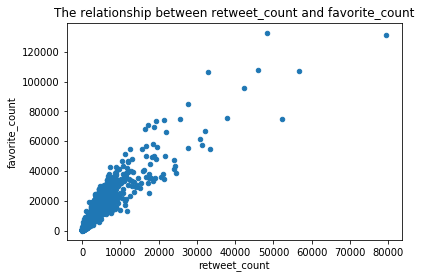

In [79]:
together_df.plot.scatter(x='retweet_count', y='favorite_count')
plot.xlabel('retweet_count')
plot.ylabel('favorite_count')
plot.title('The relationship between retweet_count and favorite_count');

An increase in retweet_count result to increase in favorite_count